한국에서는 MBTI가 유행
그리고 이를 통한 상황극이나 밈이 인기를 끌고, 
유명인들의 MBTI 성격 유형을 찾아보고 이에 비슷한 성격 유형 테스트들이 대중화되었음

빅데이터를 통해 개인화된 광고와 컨텐츠를 보여주는 시대
이를 사용해 소비자의 심리를 분석하고 원하는 상품을 기획 및 제작하는 것이 도움이 될 것이라 판단

# 1. import & Data check

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('./dataset/')

['bike-sharing-demand',
 'house-prices-advanced-regression-techniques',
 'mbti_1.csv']

In [23]:
df = pd.read_csv('./dataset/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## 1) 데이터 확인

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [25]:
df.shape
# 8675개의 데이터

(8675, 2)

In [26]:
df['type'].value_counts()
# type별 몇개씩 존재하는지 확인

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## 2) posts 분리  

'|||' 으로 구분되어 있는 것은 split 하고 comment마다 words와 words의 개수를 분산으로

In [27]:
# variance func
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x : len(x.split())/50) # 평균 문자 갯수, 50은 총 comment 수 
# df['variance_of_word_counts'] = df['posts'].apply(lambda x : var_row(x)) # 분산 
df.head()

,type,posts,words_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34


In [32]:
# hyper text는 단어 아니야

def hyper_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i for i in words if "http" in i]
    return words

# another code
# df['hyper_link'] = df['posts'].apply(lambda x : x.count("http"))

df['hyper_text'] = df['posts'].apply(hyper_text)
df.head()

,type,posts,words_per_comment,test_count,testh_h,test_nh,hyper_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ..."
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20,[http://img188.imageshack.us/img188/6422/6020d...
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ..."


In [33]:
# none hyper text
def none_hyper_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i for i in words if not "http" in i]
    return words

df['none_hyper_text'] = df['posts'].apply(none_hyper_text)
df.head()

,type,posts,words_per_comment,test_count,testh_h,test_nh,hyper_text,none_hyper_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...","[enfp, and, intj, moments, sportscenter, not, ..."
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20,[http://img188.imageshack.us/img188/6422/6020d...,"['I'm, finding, the, lack, of, me, in, these, ..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","['Good, one, _____, Of, course,, to, which, I,..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...","['Dear, INTP,, I, enjoyed, our, conversation, ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...","['You're, fired., That's, another, silly, misc..."


In [15]:
df['hyper_text'][0] # 이새끼는 유튜브밖에 안보나

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'https://www.youtube.com/watch?v=iz7lE1g4XM4',
 'https://www.youtube.com/watch?v=uCdfze1etec',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8',
 'http://www.youtube.com/watch?v=u8ejam5DP3E',
 'http://vimeo.com/22842206',
 'http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg',
 'http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg',
 'http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg',
 'https://www.youtube.com/watch?v=QyPqT8umzmY',
 'http://www.youtube.com/watch?v=gDhy7rdfm14',
 'http://www.youtube.com/watch?v=msqXffgh7b8',
 'http://www.youtube.com/watch?v=Mw7eoU3BMbE',
 'http://www.youtube.com/watch?v=4V2uYORhQOk',
 'http://www.youtube.com/watch?v=SlVmgFQQ0TI',
 'http://www.youtube.com/watch?v=IRcrv41hgz4',
 'http://www.youtube.com/watch?v=ZRCEq_JFeFM',
 'http://discovermagazin

In [34]:
# 전체 하이퍼 갯수 세기

df['hyper_counts'] = df['hyper_text'].apply(lambda x : len(x))
df.head()

,type,posts,words_per_comment,test_count,testh_h,test_nh,hyper_text,none_hyper_text,hyper_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...","[enfp, and, intj, moments, sportscenter, not, ...",24
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20,[http://img188.imageshack.us/img188/6422/6020d...,"['I'm, finding, the, lack, of, me, in, these, ...",9
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","['Good, one, _____, Of, course,, to, which, I,...",5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...","['Dear, INTP,, I, enjoyed, our, conversation, ...",2
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...","['You're, fired., That's, another, silly, misc...",6


In [17]:
# 링크들의 per_comment가 어떤 차이가 있는지 확인
df['http_per_comment'] = df['posts'].apply(lambda x : x.count("http")/50)
df.head()

,type,posts,words_per_comment,variance_of_word_counts,hyper_text,none_hyper_text,hyper_counts,http_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...","[enfp, and, intj, moments, sportscenter, not, ...",24,0.48
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,[http://img188.imageshack.us/img188/6422/6020d...,"['I'm, finding, the, lack, of, me, in, these, ...",9,0.20
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","['Good, one, _____, Of, course,, to, which, I,...",5,0.10
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...","['Dear, INTP,, I, enjoyed, our, conversation, ...",2,0.04
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...","['You're, fired., That's, another, silly, misc...",6,0.12


In [28]:
def text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i for i in words]
    return len(words)

df['test_count'] = df['posts'].apply(lambda x : text(x)/50)
df.head()

,type,posts,words_per_comment,test_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32


In [29]:
def hyper_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i for i in words if "http" in i]
    return len(words)

# another code
# df['hyper_link'] = df['posts'].apply(lambda x : x.count("http"))

df['testh_h'] = df['posts'].apply(lambda x : hyper_text(x)/50)
df.head()

,type,posts,words_per_comment,test_count,testh_h
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12


In [30]:
def none_hyper_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i for i in words if not "http" in i]
    return len(words)

df['test_nh'] = df['posts'].apply(lambda x : none_hyper_text(x)/50)
df.head()

,type,posts,words_per_comment,test_count,testh_h,test_nh
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20


In [31]:
df.head(20)

,type,posts,words_per_comment,test_count,testh_h,test_nh
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,29.82,30.80,0.02,30.78
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",26.58,27.56,0.04,27.52
7,INTJ,'I tend to build up a collection of things on ...,24.46,25.44,0.02,25.42
8,INFJ,"I'm not sure, that's a good question. The dist...",14.76,15.74,0.46,15.28
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,24.66,25.64,0.14,25.50


In [37]:
df.head(20)

,type,posts,words_per_comment,test_count,testh_h,test_nh,hyper_text,none_hyper_text,hyper_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...","[enfp, and, intj, moments, sportscenter, not, ...",24
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20,[http://img188.imageshack.us/img188/6422/6020d...,"['I'm, finding, the, lack, of, me, in, these, ...",9
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","['Good, one, _____, Of, course,, to, which, I,...",5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...","['Dear, INTP,, I, enjoyed, our, conversation, ...",2
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...","['You're, fired., That's, another, silly, misc...",6
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,29.82,30.80,0.02,30.78,[http://phantomshine.blogspot.com/2012/05/writ...,"['18/37, @.@, Science, is, not, perfect., No, ...",1
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",26.58,27.56,0.04,27.52,[https://thoughtcatalog.com/heidi-priebe/2015/...,"['No,, I, can't, draw, on, my, own, nails, (ha...",2
7,INTJ,'I tend to build up a collection of things on ...,24.46,25.44,0.02,25.42,[https://www.youtube.com/watch?v=e4dT8FJ2GE0],"['I, tend, to, build, up, a, collection, of, t...",1
8,INFJ,"I'm not sure, that's a good question. The dist...",14.76,15.74,0.46,15.28,[http://i63.photobucket.com/albums/h158/trinsg...,"[I'm, not, sure,, that's, a, good, question., ...",23
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,24.66,25.64,0.14,25.50,"['https://www.youtube.com/watch?v=w8-egj0y8Qs,...","[I'm, in, this, position, where, I, have, to, ...",7


In [39]:
df.rename(columns = {'test_count':'total_mean_words'}, inplace = True)
df.head()

,type,posts,words_per_comment,total_mean_words,testh_h,test_nh,hyper_text,none_hyper_text,hyper_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...","[enfp, and, intj, moments, sportscenter, not, ...",24
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20,[http://img188.imageshack.us/img188/6422/6020d...,"['I'm, finding, the, lack, of, me, in, these, ...",9
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","['Good, one, _____, Of, course,, to, which, I,...",5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...","['Dear, INTP,, I, enjoyed, our, conversation, ...",2
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...","['You're, fired., That's, another, silly, misc...",6


In [42]:
df.rename(columns = {'test_nh':'mean_none_hyper'}, inplace = True)
df.head()

,type,posts,words_per_comment,total_mean_words,mean_hyper,mean_none_hyper,hyper_text,none_hyper_text,hyper_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,12.10,0.48,11.62,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...","[enfp, and, intj, moments, sportscenter, not, ...",24
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,24.38,0.18,24.20,[http://img188.imageshack.us/img188/6422/6020d...,"['I'm, finding, the, lack, of, me, in, these, ...",9
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,17.70,0.10,17.60,"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","['Good, one, _____, Of, course,, to, which, I,...",5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,22.26,0.04,22.22,"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...","['Dear, INTP,, I, enjoyed, our, conversation, ...",2
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,20.32,0.12,20.20,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...","['You're, fired., That's, another, silly, misc...",6


# 2. EDA

<AxesSubplot:xlabel='type', ylabel='total_mean_words'>

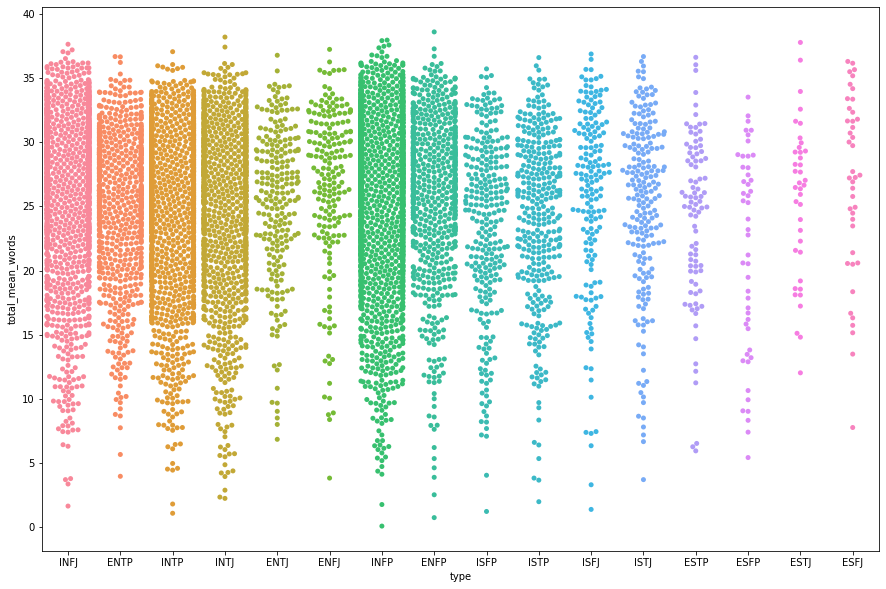

In [47]:
plt.figure(figsize = (15,10))
sns.swarmplot('type', 'total_mean_words', data=df)

In [48]:
df.groupby('type').agg({'type':'count'})
# 내림차순으로 출력될 수 있도록 하는 옵션 추가해두기


,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [52]:
df.groupby("type").agg({"mean_hyper" : "mean"})

,mean_hyper
type,
ENFJ,0.052947
ENFP,0.050074
ENTJ,0.052727
ENTP,0.047912
ESFJ,0.026190
ESFP,0.055417
ESTJ,0.052821
ESTP,0.064719
INFJ,0.065537


In [54]:
df.groupby("type").agg({"mean_none_hyper" : "mean"})

,mean_none_hyper
type,
ENFJ,26.634842
ENFP,26.109156
ENTJ,25.258442
ENTP,25.027562
ESFJ,26.722381
ESFP,21.286667
ESTJ,25.494872
ESTP,24.136404
INFJ,26.459320


# 3. Feature Engineering

# 4. Modeling
여러 classification을 비교해봅니다